In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Question. 1a**

In [2]:
# simple k-means function
def k_means(data, centroids):
    # Step 1: Initialization
    clusters = [[] for _ in range(len(centroids))]
    n = 0

    while n < 100:
        # Step 2: Assignment
        for point in data:
            distances = [math.dist(point, centroid) for centroid in centroids]
            cluster_idx = distances.index(min(distances))
            clusters[cluster_idx].append(point)
        
        # Step 3: Update
        new_centroids = []
        for i, cluster in enumerate(clusters):
            if cluster:
                new_centroid = [sum(x)/len(cluster) for x in zip(*cluster)]
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)
        
        # Check for convergence
        if new_centroids == centroids:
            break
        
        # Step 1: Re-initialize
        centroids = new_centroids
        clusters = [[] for _ in range(len(centroids))]
        n += 1
    
    # Return final centroids and clusters
    return centroids, clusters


In [4]:
data_file = '/content/sample_data/f150_motor_distributors.txt'
raw_data = pd.read_csv(data_file, delimiter = ",",names=['timing speed', 'rcoil gaps'])
raw_data.head(5)


,timing speed,rcoil gaps
0,-11.969996,-8.039628
1,-26.961416,-6.962109
2,-12.915849,-1.378941
3,22.476144,2.066612
4,-13.146631,4.835322


In [5]:
data = raw_data.values.tolist()

In [6]:
centroids = [[10, 10], [-10,-10],[2,2],[3,3], [-3,-3]]

In [7]:
new_centroids, clusters = k_means(data, centroids)

**Question. 1b**

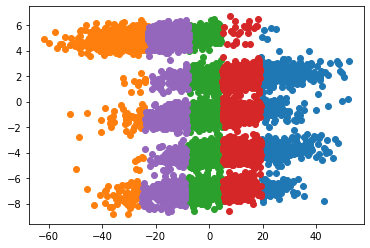

In [8]:
for cluster in clusters:
  x = [p[0] for p in cluster]
  y = [p[1] for p in cluster]

  plt.scatter(x, y)

**Question. 1c**

First, just by obeservation of scatter points we can see there are approximately 5 groups of data. To be more scientifical, we can use a method called the elbow method. Computing SSE for some values of k and plot them. The elbow method is about to choose the k at which the SSE decreases abruptly.

This time these clusters don't plot very well. It's because the value ranges of two variables vary a lot. I think normalization before clustering would be a good way to improve the output.

**Question. 2a**

In [9]:
P = [[10, 0.5],[-10,0.25]]

P = np.array(P)

inv_P = np.linalg.inv(np.dot(P.T, P))

print(inv_P)

[[ 0.00555556 -0.04444444]
 [-0.04444444  3.55555556]]


In [10]:
def mahalanobis_distance(x, y, P, inv_P):
    # Convert x, y and P into numpy arrays
    x = np.array(x)
    y = np.array(y)
    
    # Compute Mahalanobis distance between x and y using matrix P
    diff = x - y
    return np.sqrt(np.dot(np.dot(diff, inv_P), diff.T))

def k_means_mahalanobis(data, centroids, P, inv_P):
    # Step 1: Initialization
    clusters = [[] for _ in range(len(centroids))]

    while True:
        # Step 2: Assignment
        for point in data:
            distances = [mahalanobis_distance(point, centroid, P, inv_P) for centroid in centroids]
            cluster_idx = distances.index(min(distances))
            clusters[cluster_idx].append(point)
        
        # Step 3: Update
        new_centroids = []
        for i, cluster in enumerate(clusters):
            if cluster:
                new_centroid = [sum(x)/len(cluster) for x in zip(*cluster)]
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)
        
        # Check for convergence
        if new_centroids == centroids:
            break
        
        # Step 1: Re-initialize
        centroids = new_centroids
        clusters = [[] for _ in range(len(centroids))]

    
    # Return final centroids and clusters
    return centroids, clusters


In [11]:
centroids_2, clusters_2 = k_means_mahalanobis(data, centroids, P, inv_P)

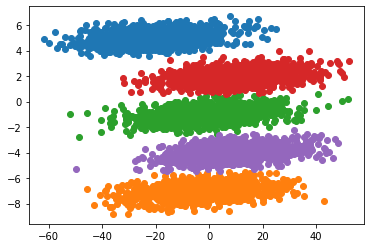

In [12]:
for cluster in clusters_2:
  x = [p[0] for p in cluster]
  y = [p[1] for p in cluster]

  plt.scatter(x, y)

**Question. 2b**

In [15]:
data = np.array(data)

def principal_components(data):
  # Center the data by subtracting the mean of each column
  data_centered = data - np.mean(data, axis=0)

  # Compute the SVD of the centered data
  U, s, Vt = np.linalg.svd(data_centered)

  # Extract the principal components (i.e., the columns of the matrix Vt)
  principal_components = Vt.T

  return principal_components

# Print the principal components
print("The principal components of aggregated data is: ", principal_components(data))

The principal components of aggregated data is:  [[ 0.99838317  0.05684225]
 [-0.05684225  0.99838317]]


**Question. 2c**

In [18]:
for i, cluster in enumerate(clusters_2):
  print("The principal components of cluster %d is: "%(i+1), principal_components(cluster), "\n")

The principal components of cluster 1 is:  [[-0.99993527 -0.01137789]
 [-0.01137789  0.99993527]] 

The principal components of cluster 2 is:  [[ 0.99992533  0.01222027]
 [ 0.01222027 -0.99992533]] 

The principal components of cluster 3 is:  [[ 0.99990986 -0.01342629]
 [ 0.01342629  0.99990986]] 

The principal components of cluster 4 is:  [[-0.99993306  0.01157047]
 [-0.01157047 -0.99993306]] 

The principal components of cluster 5 is:  [[ 0.99989374 -0.01457781]
 [ 0.01457781  0.99989374]] 



These principal components are different from each other.

**Question. 2d**

If we apply the transformation represented by P' to the original data, the resulting transformed data will be aligned with the principal components of the data. 